### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'vscode'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [125]:
data = pd.read_csv('data/coupons.csv')

In [126]:
# Row and coloum count
data.shape

(12684, 26)

In [127]:
# Examining the data using first 5 columns
data.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [128]:
#Find information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [129]:
data.describe

<bound method NDFrame.describe of            destination  passanger weather  temperature  time  \
0      No Urgent Place      Alone   Sunny           55   2PM   
1      No Urgent Place  Friend(s)   Sunny           80  10AM   
2      No Urgent Place  Friend(s)   Sunny           80  10AM   
3      No Urgent Place  Friend(s)   Sunny           80   2PM   
4      No Urgent Place  Friend(s)   Sunny           80   2PM   
...                ...        ...     ...          ...   ...   
12679             Home    Partner   Rainy           55   6PM   
12680             Work      Alone   Rainy           55   7AM   
12681             Work      Alone   Snowy           30   7AM   
12682             Work      Alone   Snowy           30   7AM   
12683             Work      Alone   Sunny           80   7AM   

                      coupon expiration  gender age      maritalStatus  ...  \
0            Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1               Coffee House         2h

2. Investigate the dataset for missing or problematic data.

In [130]:
#examine the data to find any missing values
missing_values = data.isnull().sum()
missing_values

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

<Axes: >

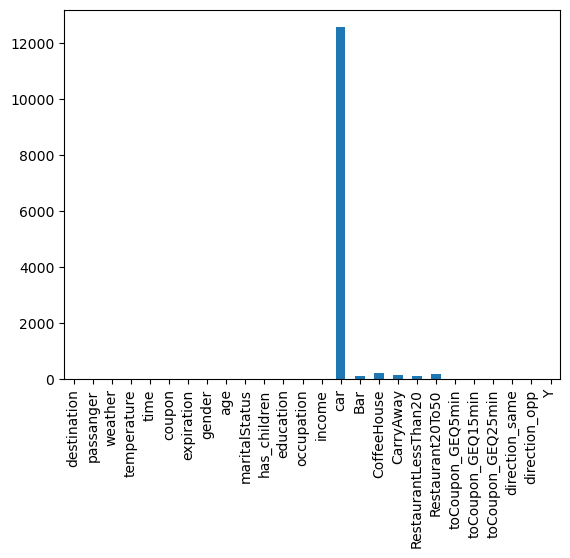

In [131]:
data.isnull().sum().plot(kind="bar")

In [132]:
#On examining the data, 'Car' has a huge number of null values. This is not adding much value to dataframe. So deleting the coloumn from the dataset. 
data_cleaned = data.drop(columns=['car'])

<Axes: >

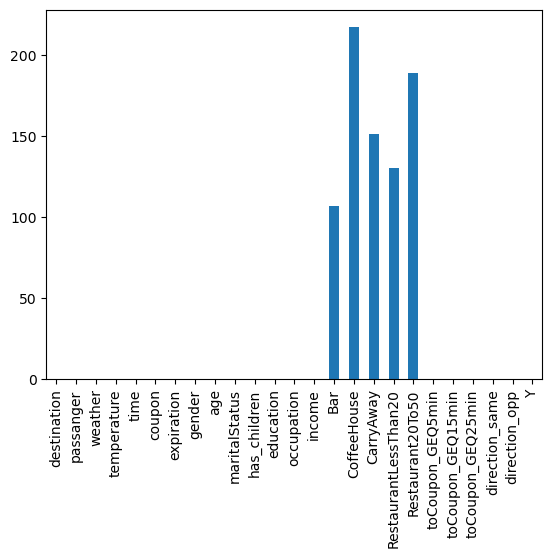

In [133]:
#Now lets see how null values in the cleaned_data looks
data_cleaned.isnull().sum().plot(kind="bar")

4. What proportion of the total observations chose to accept the coupon?



In [134]:
# get the total number of rows and those rows with Y=1 and find propotion
accept_coupon = (data_cleaned['Y'].sum() / data_cleaned['Y'].shape[0])
accept_coupon

0.5684326710816777

5. Use a bar plot to visualize the `coupon` column.

In [135]:
value_counts = data_cleaned['coupon'].value_counts()
coupon_barplot = px.bar(value_counts, color=value_counts, text=value_counts, title = 'Bar graph of coupon type')
coupon_barplot.update_layout(yaxis_title="coupon_count")


6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='Count'>

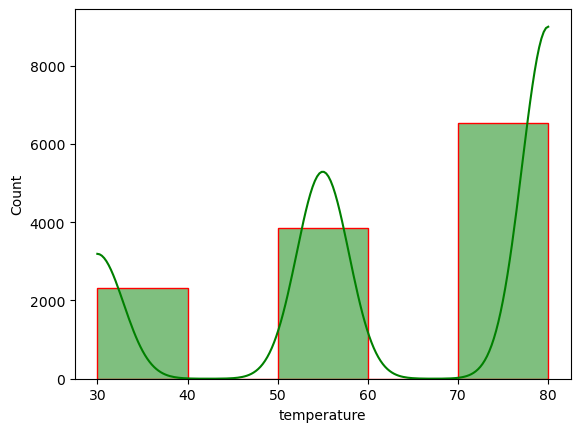

In [136]:
sns.histplot(data_cleaned['temperature'], bins=5, kde=True, color='green', edgecolor='red')

(array([0.02556291, 0.        , 0.        , 0.04238411, 0.        ,
        0.        , 0.07205298]),
 array([30.        , 37.14285714, 44.28571429, 51.42857143, 58.57142857,
        65.71428571, 72.85714286, 80.        ]),
 <BarContainer object of 7 artists>)

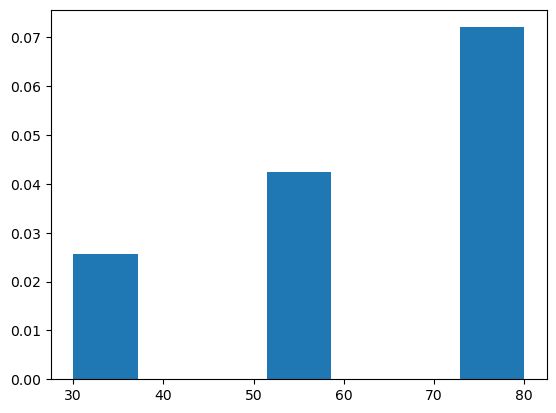

In [137]:
plt.hist(data_cleaned['temperature'], density=True, bins=7)

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [138]:
#more data massaging
bar_coupons_df = data_cleaned.query('coupon == "Bar"')
bar_coupons_df

bar_coupons_df['income'] = bar_coupons_df['income'].str.replace('$','').str.replace('100000 or More','100000 - 500000').str.replace('Less than 12500','0 - 12500')
bar_coupons_df[['income_lowerbound','income_upperbound']] = bar_coupons_df.income.str.split(" - ", expand = True)

/var/folders/55/x837yjcj345fvyz78_wh348h0000gn/T/ipykernel_54600/4111087848.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/55/x837yjcj345fvyz78_wh348h0000gn/T/ipykernel_54600/4111087848.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/55/x837yjcj345fvyz78_wh348h0000gn/T/ipykernel_54600/4111087848.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

2. What proportion of bar coupons were accepted?


In [139]:
print(bar_coupons_df.shape)
accepted_bar_coupons = bar_coupons_df.query('Y == 1')
accepted_bar_coupons_propotion = (accepted_bar_coupons.shape[0]/bar_coupons_df.shape[0])*100
accepted_bar_coupons_propotion

not_accepted_bar_coupons = bar_coupons_df.query('Y == 0')
not_accepted_bar_coupons_propotion = (not_accepted_bar_coupons.shape[0]/bar_coupons_df.shape[0])*100
print(accepted_bar_coupons_propotion,not_accepted_bar_coupons_propotion)


(2017, 27)
41.00148735746158 58.99851264253842


In [140]:
fig = px.pie(bar_coupons_df, names='Y', title = 'Bar Coupon Acceptance Rate')
fig.update_traces(textposition='inside', textinfo='percent+label')


There are more drivers rejecting coupons than acceping it. Acceptance rate is 41% wheres rejection rate is 59%

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [141]:
values_LessThan_3 = ['never','less1','1~3']
values_MoreThan_3 = ['gt8','4~8']

total_lessthan_3 = bar_coupons_df['Bar'].loc[bar_coupons_df['Bar'].isin(values_LessThan_3)].count()
total_morethan_3 = bar_coupons_df['Bar'].loc[bar_coupons_df['Bar'].isin(values_MoreThan_3)].count()
total_morethan_3

199

In [142]:
acceptancerate_lessthan_3 = accepted_bar_coupons['Bar'].loc[accepted_bar_coupons['Bar'].isin(values_LessThan_3)].count()
acceptancerate_morethan_3 = accepted_bar_coupons['Bar'].loc[accepted_bar_coupons['Bar'].isin(values_MoreThan_3)].count()

print(acceptancerate_lessthan_3/total_lessthan_3, acceptancerate_morethan_3/total_morethan_3)

0.37061769616026713 0.7688442211055276


As expected, the more the frequency is to Bar, the higher is the acceptance rate as determined by the propotions. We can see that drving visting Bar more than 3 times have a Bar coupon aeeptance rate of 76.88%

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [143]:
accepted_bar_coupons['age'] = accepted_bar_coupons['age'].replace('50plus','51').replace('below21','20').astype(int)
bar_coupons_df['age'] = bar_coupons_df['age'].replace('50plus','51').replace('below21','20').astype(int)

morethan_onceMonth_values = ['1~3','gt8','4~8']
morethan_onceMonth_ageGrt25_total = bar_coupons_df.loc[(bar_coupons_df['Bar'].isin(morethan_onceMonth_values)) & (bar_coupons_df['age']>25)]

morethan_onceMonth_ageGrt25 = morethan_onceMonth_ageGrt25_total.query('Y == 1')
propotion_morethan_onceMonth_ageGrt25 = morethan_onceMonth_ageGrt25.shape[0]/morethan_onceMonth_ageGrt25_total.shape[0]
propotion_morethan_onceMonth_ageGrt25


/var/folders/55/x837yjcj345fvyz78_wh348h0000gn/T/ipykernel_54600/3655232603.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/55/x837yjcj345fvyz78_wh348h0000gn/T/ipykernel_54600/3655232603.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0.6952380952380952

It is clear that frequency and age affect the rate of bar coupon acceptance. The more is the age/frequency, the higher is the chance of accepting bar coupon and vice versa. In our example, we see drivers who visit bar ore than once a month and are over the age of 26 have 69.5% chance of accepting a bar coupon.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [144]:
undesired_occupation = ['farming','fishing','forestry']

count_total = bar_coupons_df.loc[(bar_coupons_df['Bar'].isin(morethan_onceMonth_values)) & (bar_coupons_df['passanger'] != 'Kid(s)') & ~(bar_coupons_df['occupation'].isin(undesired_occupation))]
count = count_total.query('Y == 1')
count_propotion = count.shape[0]/count_total.shape[0]

count_propotion



0.7132486388384754

It is evident that drivers with kids tend to avoid visiting bar. Also seems occupation influences the coupon acceptance rate. Drivers who have a higher frequency of visting bar and are not woth kids and not work in farming, fishing or forestry industry has around 71.32% of acceptance rate for Bar coupons.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [145]:
print(bar_coupons_df['maritalStatus'].unique())
accepted_restaurantcount = ['4~8', 'gt8']

accepted_bar_coupons['income_upperbound'] = accepted_bar_coupons['income_upperbound'].astype(int)
bar_coupons_df['income_upperbound'] = bar_coupons_df['income_upperbound'].astype(int)


count5 = bar_coupons_df.loc[
    (bar_coupons_df['Bar'].isin(morethan_onceMonth_values)) & (bar_coupons_df['passanger'] != 'Kid(s)') &(bar_coupons_df['maritalStatus'] != 'Widowed') |
    (bar_coupons_df['Bar'].isin(morethan_onceMonth_values)) & (bar_coupons_df['age']<25) |
    (bar_coupons_df['RestaurantLessThan20'].isin(accepted_restaurantcount) & (bar_coupons_df['income_upperbound'] < 50000))

]

count6 = count5.query('Y == 1')
count7 = count6['Y'].shape[0] / count5['Y'].shape[0]
print(count6['Y'].shape[0] , count5['Y'].shape[0])
count7

['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
454 772


/var/folders/55/x837yjcj345fvyz78_wh348h0000gn/T/ipykernel_54600/981680452.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/55/x837yjcj345fvyz78_wh348h0000gn/T/ipykernel_54600/981680452.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0.5880829015544041

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

A driver is more likely to accept bar coupon if they vist bar more frequenly , more than 3 times a month. Age affects the usage of these coupons too if the driver is a frequent visitor to the bar. Low income is after affecting factor. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [146]:
print(data['coupon'].unique())
ch_df = data_cleaned.query('coupon == "Coffee House"')


['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']


In [147]:
#What part of coffee coupons were accepted.
#Created a dataframe for further analysis
ch_df_accepted = ch_df.query('Y == 1')
ch_df_rejected = ch_df.query('Y==0')

fig = px.pie(ch_df, names='Y', title = 'Coffee Coupon Acceptance Rate')
fig.update_traces(textposition='inside', textinfo='percent+label')



Seems like its acceptance and rejection for coffee is almost the same. 

In [148]:
#how does accepted coupon usage change with passenger type?

value_counts = ch_df_accepted['passanger'].value_counts()
coupon_barplot = px.bar(value_counts, color=value_counts, text=value_counts, title = 'Bar graph of accepted offee coupon')
coupon_barplot.update_layout(yaxis_title="coupon_count")

In [149]:
value_counts = ch_df_rejected['passanger'].value_counts()
coupon_barplot = px.bar(value_counts, color=value_counts, text=value_counts, title = 'Bar graph of rejected coffee coupon')
coupon_barplot.update_layout(yaxis_title="coupon_count")

Looks like coffee is an amazing companion when travelling alone. Also seems its like also the most rejected when travelling alone and most used when travelling wuth a friend.

In [150]:
#propotion of coffee coupon accepted when travelling alone, weather is snowy or rain and based
total_count = ch_df.loc[(ch_df['passanger'] == 'Alone') & (ch_df['weather'].isin(['Snowy','Rainy']))]
accepted_count = total_count.query('Y == 1')
accepted_propotion = accepted_count.shape[0] / total_count.shape[0]
accepted_propotion

0.4570815450643777

Where I expected it to be of a greater value, seems onlu 45% of the drivers accept a coffee coupon when travelling alone and its snowing or raining.

In [151]:
#how does gender, maritalStatus and age affect coupon acceptance in general
fig = px.histogram(ch_df[['age', 'gender', 'maritalStatus']], nbins=10, height=400, width=500)
fig.update_traces(marker_line_color='black',
                  marker_line_width=0.5)
fig.update_layout(
    xaxis_title="Age, gender and marital status",
    yaxis_title="Coupon Accptance count",
    xaxis=dict(
        tickangle=-45  # Tilt the labels by 45 degrees
    )
)


Gender doesnt matter much in terms of coffee coupon acceptance.
Drivers with age around 21 tend to intake more coffee than their elderly counterpart.


In [152]:
#Coffee baed on weather
fig = px.pie(ch_df, names='weather', title = 'Coffee Coupon Acceptance Rate')
fig.update_traces(textposition='inside', textinfo='percent+label')


This one comes as a surprise. Drivers aceept coffee coupons the most when it is sunny.